In [7]:
import pandas as pd
import numpy as np

In [23]:
df_is_otc = pd.read_csv('rx_otc.csv',header=None)
df_is_otc.columns = ['item_id','is_otc']
data = pd.read_csv('data.csv',header=None)
data.columns = ['orderid','itemid','quantity']
orders = pd.read_csv('orders.csv',header=None)
orders.columns = ['userid','orderid','date']


458


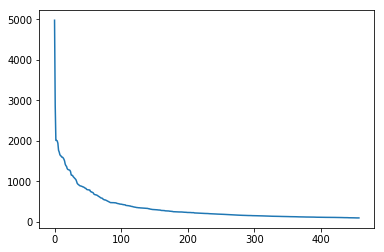

In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

otc_count_x = 3
rx_count_y = 2
days_z = 30

# Read SKU and OTCs
f = open('rx_otc.csv', 'r')
skus = {}
for line in f:
    line = line.strip().replace('"', '').split(',')
    skus[line[0]] = line[1]

f = open('orders.csv', 'r')

user_orders = defaultdict(lambda: {})
order_user = {}

for line in f:
    line = line.replace('"', '').strip().split(',')
    if len(line) != 3:
        continue
    user_orders[line[0]][line[1]] = {'date': line[2], 'items': []}
    order_user[line[1]] = line[0]

f = open('data.csv', 'r')

for line in f:
    line = line.replace('"', '').strip().split(',')
    user_id = order_user.get(line[0])
    if user_id:
        user_orders[user_id][line[0]]['items'].append(line[1])


buckets = [0] + [2*(x+1) for x in range(10)] + [999999]
dx = [0 for _ in range(len(buckets))]
dx2 = [0 for _ in range(len(buckets))]

sku_freqs = defaultdict(lambda: 0)

for k, v in user_orders.items():
    tot_count = 0 #RX
    tot_count2 = 0 #OTC
    ordered_sets = defaultdict(lambda: 0)
    for k2, v2 in v.items():
        try:
            order_date = datetime.strptime(v2['date'], '%Y-%m-%d %H:%M:%S.%f').date()
        except:
            order_date = datetime.strptime(v2['date'], '%Y-%m-%d %H:%M:%S').date()
        #if order_date.year == 2017:
        for i in v2['items']:
            ordered_sets[i] += 1

    for i, v in ordered_sets.items():
        if skus.get(i) == "FALSE":
            tot_count +=1
        else:
            if v>1:
                sku_freqs[i] += 1

    # if tot_count:
    #     for b in buckets:
    #         if tot_count <= b:
    #             dx[buckets.index(b)] += 1

    # if tot_count2:
    #     for b in buckets:
    #         if tot_count2 <= b:
    #             dx2[buckets.index(b)] += 1

for_sort = []
for k, v in sku_freqs.items():
    if v>100:
        for_sort.append((k, v))

for_sort.sort(key=lambda x: x[1], reverse=True)

#for i in for_sort:
    #print(i)

print(len(for_sort))

plt.plot([x[1] for x in for_sort])
plt.show()

In [24]:
# for top 10 skus

data=data.loc[data['itemid'].isin(top_otc)].reset_index(drop=True)
        

In [25]:
df=pd.merge(data,orders,how='inner',on='orderid').sort_values(by='itemid',ascending=[True]).reset_index(drop=True)
df.head(5)

,orderid,itemid,quantity,userid,date
0,PO13417529697875,111246,2,ecd19f77-96e0-480c-9afa-d3ffd8a4b13a,2017-05-15 20:13:25.836303
1,PO291742610329,111246,10,harinderkalra@yahoo.com,2017-01-30 17:20:10.954574
2,PO1061631868-1419,111246,1,22.naveen@gmail.com,2016-04-16 14:21:02.779352
3,PO2917430648187,111246,5,4a0c43f0-6bb7-403c-bb4a-bf45848f2c14,2017-01-30 17:27:44.070631
4,PO2917431439018,111246,2,deepaligupta57@gmail.com,2017-01-30 17:29:03.651304


In [26]:
df.date = df.date.apply(lambda x:x.split(' ')[0])
df['date'] =pd.to_datetime(df.date)

In [27]:
list(set(df.itemid))

[323584,
 328129,
 323587,
 212549,
 323589,
 322631,
 325341,
 328581,
 323562,
 323597,
 111246,
 138032,
 328529,
 328538,
 328562,
 328150,
 323576,
 137210,
 323581,
 144190]

In [17]:
df1 = df[df.itemid==71072].sort_values(by='date').reset_index(drop=True)
df1.head(5)

,orderid,itemid,quantity,userid,date
0,PO13138696-133,71072,10,sumeet.gupta1982@gmail.com,2013-05-18
1,PO13162623-110,71072,20,sumeet.gupta1982@gmail.com,2013-06-11
2,PO13169518-120,71072,20,RAHUL.KRAINDIA@GMAIL.COM,2013-06-18
3,PO13172182-108,71072,20,sumeet.gupta1982@gmail.com,2013-06-27
4,PO1320459-181,71072,10,sumeet.gupta1982@gmail.com,2013-07-23


In [28]:
import pickle
skus = pickle.load(open('skunames.p','rb'))

In [35]:
len(set(df.itemid))

20

In [ ]:
328581

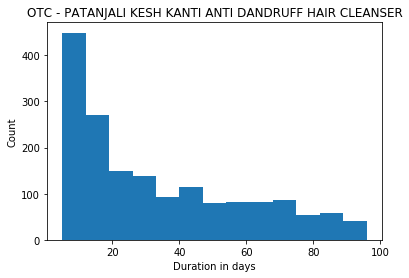

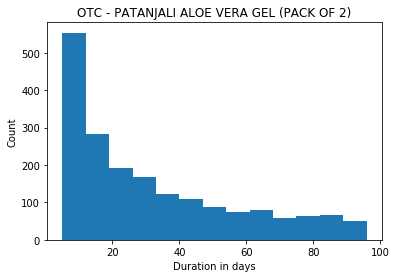

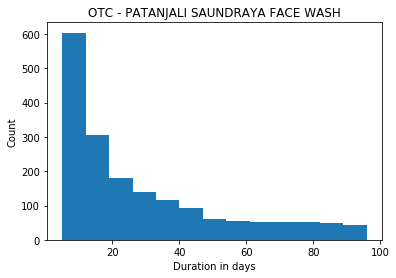

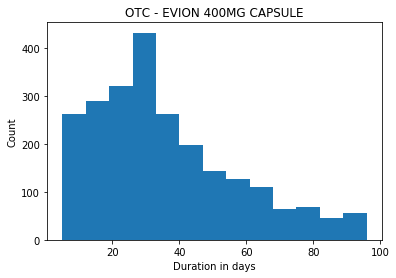

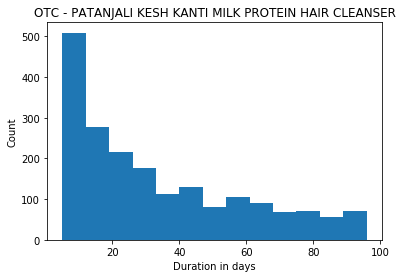

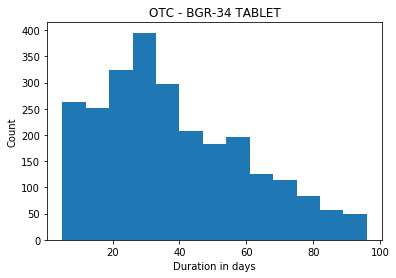

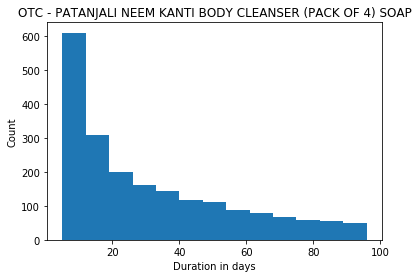

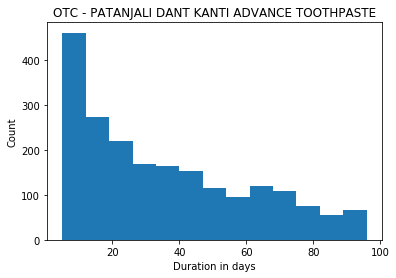

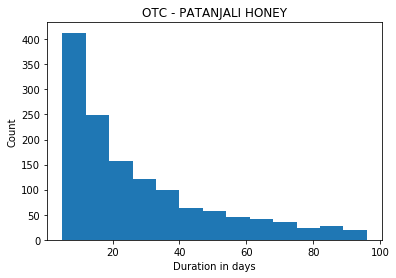

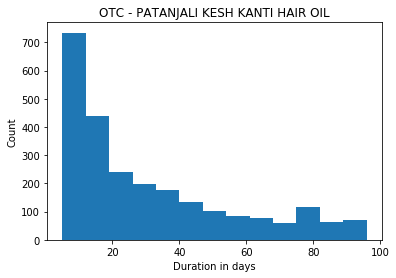

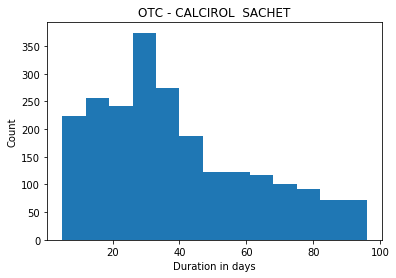

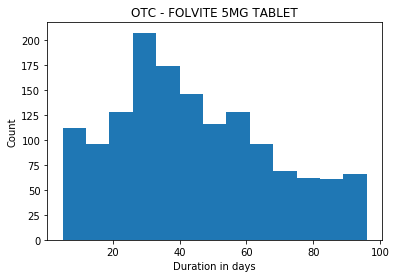

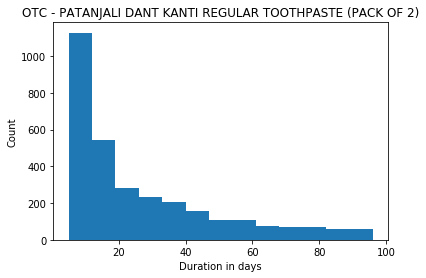

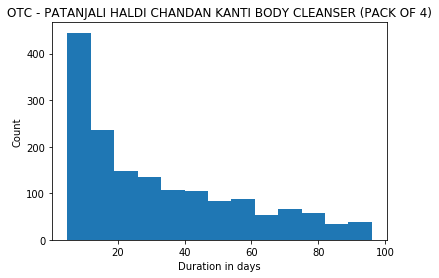

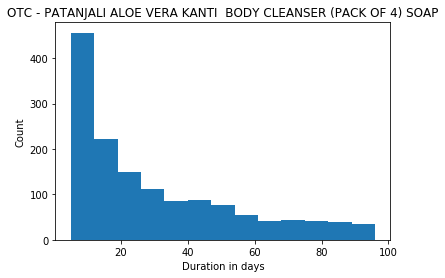

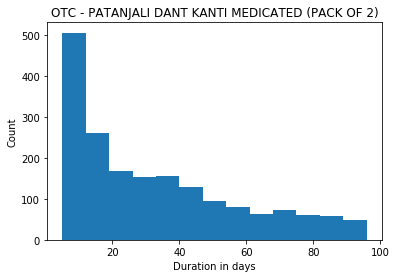

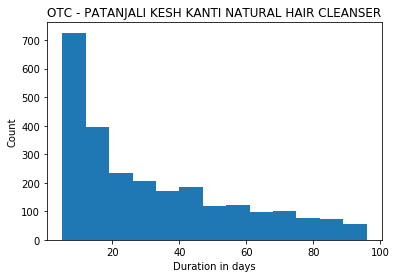

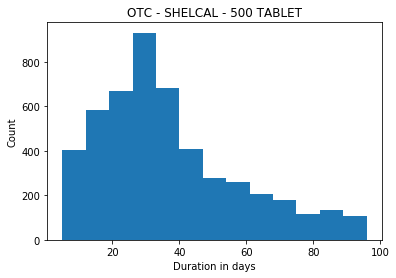

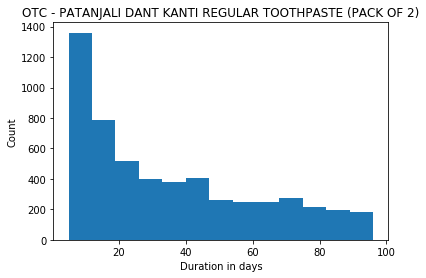

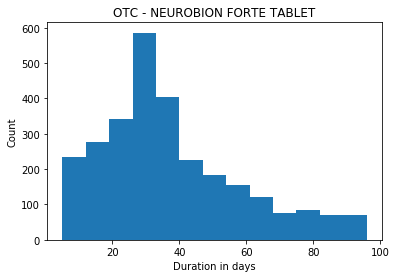

In [33]:
d=dict()
for i in list(set(df.itemid)):
    #import matplotlib.pyplot as plt
    #print (i)
    plt.clf()
    df1 = df[df.itemid==i].sort_values(by='date').reset_index(drop=True)
    dist = []
    for user in list(set(df1.userid)):
        #print (user)
        df_user = df1[df1.userid==user].drop_duplicates('date','first').reset_index(drop=True)
        for j in range(len(df_user)-1):
            
            
            #print (df_user.orderid[j],df_user.quantity[j],df_user.date[j])
            #print (((pd.Timedelta(df_user.date[j+1]-df_user.date[j]).total_seconds())/int(df_user.quantity[j]))/(3600*24))
            dist.append(((pd.Timedelta(df_user.date[j+1]-df_user.date[j]).total_seconds())/(3600*24)))
            #print (df_user.quantity[j])
            #print ((df_user.date[j+1]-df_user.date[j])/int(df_user.quantity[j]))
    d[i]=dist    
    plt.hist(dist, bins=list(range(5,100,7)))
    #fig = plt.figure()
    
    #fig.suptitle('Item ID - %s'%i, fontsize=20)
    plt.xlabel('Duration in days')
    plt.ylabel('Count')
    plt.title('OTC -'+' '+skus['%s'%i])
    #plt.savefig('top20_otc_dist/%s.png'%i)
    

    plt.show()

In [31]:
x=0
for i in range(len(dist)):
    if dist[i]==30:
        x+=1
        
print (x)

9


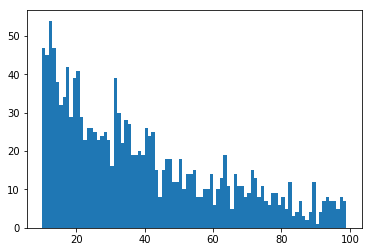

In [119]:
#binning 
plt.hist(dist, bins=list(range(10,100)))
plt.show()